In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**DATA COLLECTION AND PREPARATION **

IMPORTING THE REQUIRED LIBRARIES 

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder , MinMaxScaler , OrdinalEncoder , StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,RocCurveDisplay
from scipy.stats import randint
import pickle
import warnings 
warnings.filterwarnings('ignore')

COLLECT AND READ THE DATASET 

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/flightdata.csv')

In [38]:
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

selecting useful features...

In [40]:
df = df[['FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','CRS_ARR_TIME','DEP_DEL15','ARR_DEL15','DEP_DELAY']]

In [41]:
df.isnull().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
DEP_DELAY       107
dtype: int64

missing value handling 

In [42]:
df['DEP_DEL15'].fillna(df['DEP_DEL15'].mode()[0],inplace=True)
df['ARR_DEL15'].fillna(df['ARR_DEL15'].mode()[0],inplace=True)
df['DEP_DELAY'].fillna(df['DEP_DELAY'].median(),inplace=True)

In [43]:
df.isnull().sum()

FL_NUM          0
MONTH           0
DAY_OF_MONTH    0
DAY_OF_WEEK     0
ORIGIN          0
DEST            0
CRS_ARR_TIME    0
DEP_DEL15       0
ARR_DEL15       0
DEP_DELAY       0
dtype: int64

In [44]:
df.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,DEP_DELAY
0,1399,1,1,5,ATL,SEA,2143,0.0,0.0,2.0
1,1476,1,1,5,DTW,MSP,1435,0.0,0.0,-1.0
2,1597,1,1,5,ATL,SEA,1215,0.0,0.0,2.0
3,1768,1,1,5,SEA,MSP,1335,0.0,0.0,1.0
4,1823,1,1,5,SEA,DTW,607,0.0,0.0,-4.0


**EXPLORATORY DATA ANALYSIS**

In [45]:
df.describe()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,DEP_DELAY
count,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000
mean,1334.325617,6.628973,15.790758,3.960199,1537.312795,0.141483,0.122429,8.370136
std,811.875227,3.354678,8.782056,1.995257,502.512494,0.348535,0.327795,36.598951
min,7.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,-16.000000
25%,624.000000,4.000000,8.000000,2.000000,1130.000000,0.000000,0.000000,-3.000000
50%,1267.000000,7.000000,16.000000,4.000000,1559.000000,0.000000,0.000000,-1.000000
75%,2032.000000,9.000000,23.000000,6.000000,1952.000000,0.000000,0.000000,4.000000
max,2853.000000,12.000000,31.000000,7.000000,2359.000000,1.000000,1.000000,645.000000


univariate analysis

<Axes: xlabel='DEP_DELAY', ylabel='Density'>

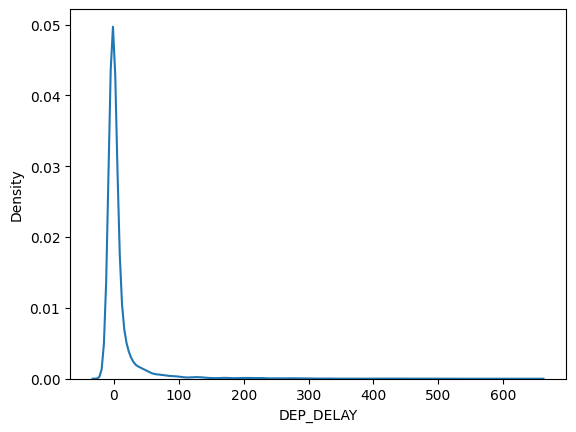

In [46]:
sns.distplot(df['DEP_DELAY'],hist=False)

<Axes: xlabel='CRS_ARR_TIME', ylabel='Count'>

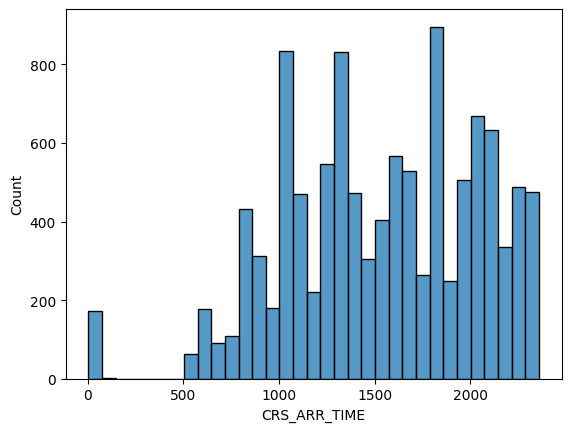

In [47]:
sns.histplot(df['CRS_ARR_TIME'])

<Axes: ylabel='count'>

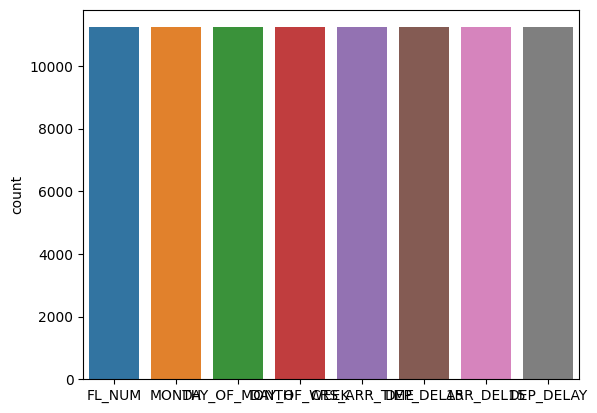

In [48]:
sns.countplot(df,)

<Axes: ylabel='DEP_DELAY'>

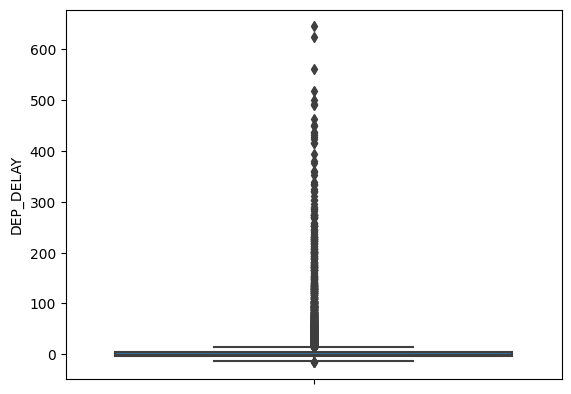

In [49]:
sns.boxplot(df,y='DEP_DELAY')

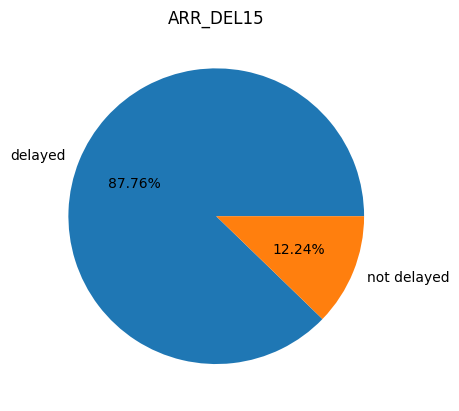

In [50]:
plt.title('ARR_DEL15')
plt.pie(df.ARR_DEL15.value_counts(),labels = ['delayed','not delayed'],autopct="%.2f%%")
plt.show()

bivariate analysis

<Axes: xlabel='DAY_OF_MONTH', ylabel='Count'>

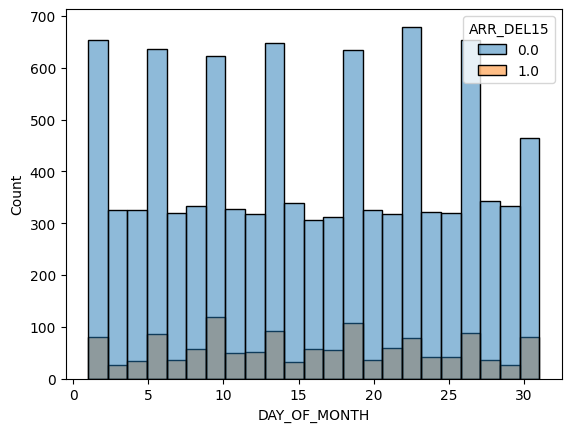

In [54]:
sns.histplot(data = df,x='DAY_OF_MONTH',hue='ARR_DEL15')

<Axes: xlabel='CRS_ARR_TIME', ylabel='DEP_DELAY'>

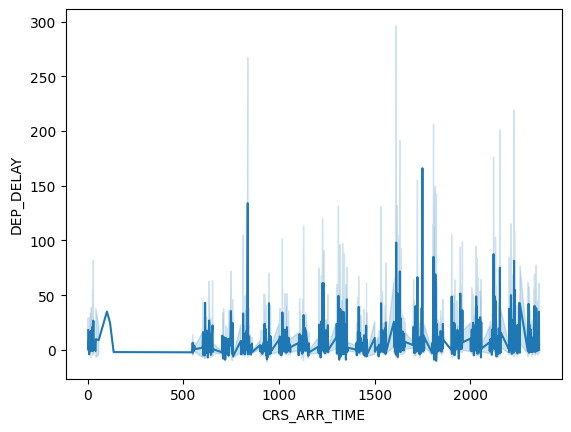

In [55]:
sns.lineplot(df,x='CRS_ARR_TIME',y='DEP_DELAY')

<Axes: xlabel='ARR_DEL15', ylabel='count'>

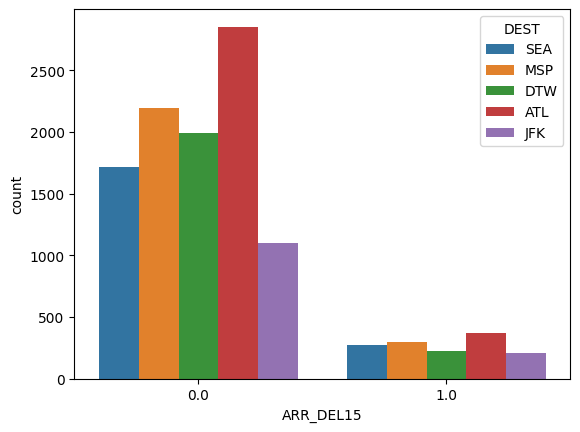

In [56]:
sns.countplot(data = df,x='ARR_DEL15',hue='DEST')

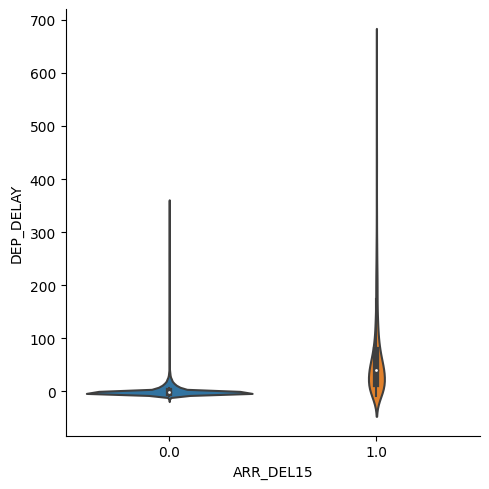

In [57]:
sns.catplot(df,x='ARR_DEL15',y='DEP_DELAY',kind='violin')

<Axes: xlabel='ARR_DEL15', ylabel='count'>

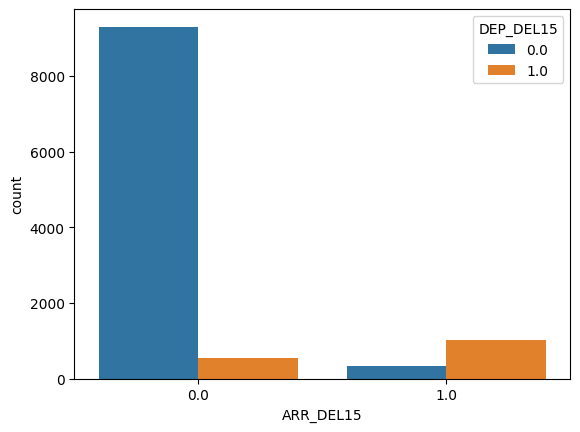

In [58]:
sns.countplot(data = df,x='ARR_DEL15',hue='DEP_DEL15')

multivariate analysis

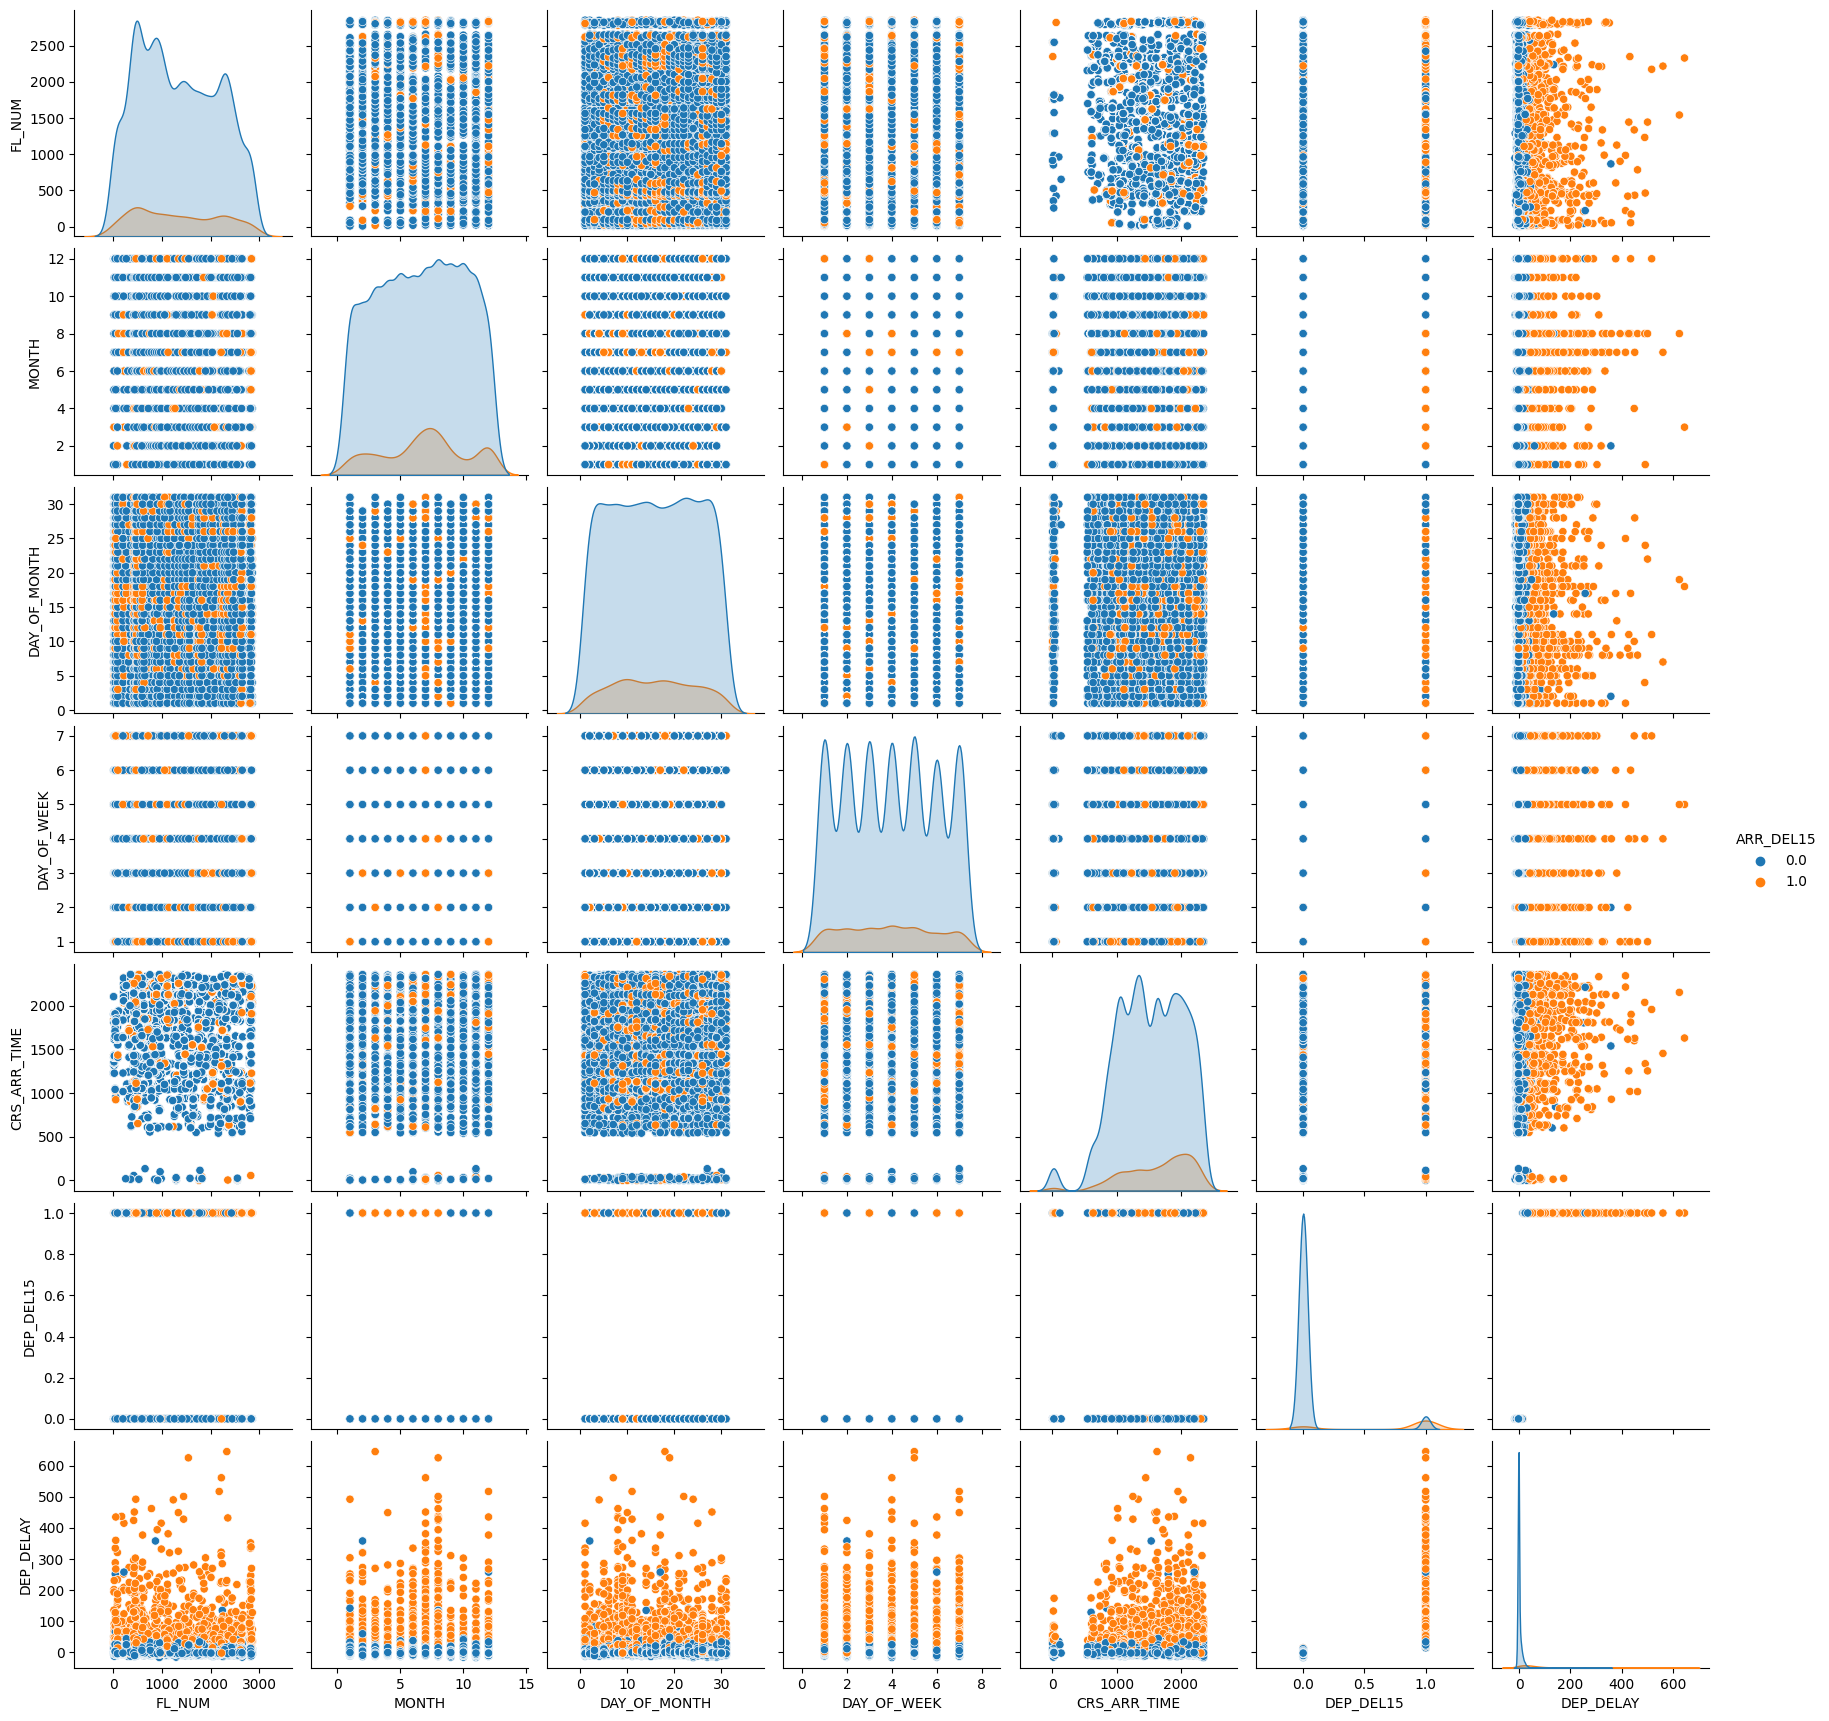

In [59]:
sns.pairplot(df,hue='ARR_DEL15')

<Axes: >

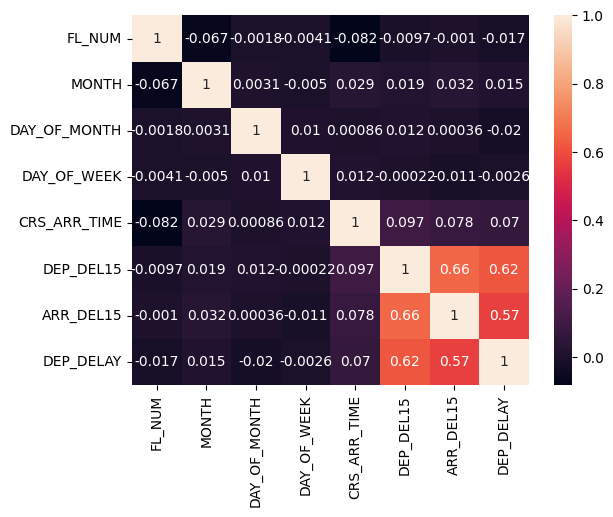

In [60]:
sns.heatmap(df.corr(),annot=True)

In [61]:
x = df[['FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST','CRS_ARR_TIME','DEP_DEL15','DEP_DELAY']]
y = df['ARR_DEL15']

categorical value handling , scaling

In [62]:
oe = ColumnTransformer([('oe',OrdinalEncoder(),['FL_NUM','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','ORIGIN','DEST'])],remainder='passthrough')
x = pd.DataFrame(oe.fit_transform(x),columns=oe.get_feature_names_out())
pickle.dump(oe,open('oe.pkl','wb'))

sc = ColumnTransformer([('sc',StandardScaler(),['oe__FL_NUM','remainder__CRS_ARR_TIME','remainder__DEP_DELAY'])],remainder='passthrough')
x = pd.DataFrame(sc.fit_transform(x),columns=sc.get_feature_names_out())
pickle.dump(sc,open('sc.pkl','wb'))

train , test splitting

In [63]:
x_train , x_test , y_train , y_test = train_test_split(x,y,random_state=42)

model building

random forest model

In [64]:
rc = RandomForestClassifier()
rc.fit(x_train,y_train)
y_pred = rc.predict(x_test)

print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9394586894586895


decision tree model

In [65]:
dc = DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_pred = dc.predict(x_test)

print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.8885327635327636


ANN model

In [66]:
cl = Sequential()
cl.add(Dense(64,activation='relu'))
cl.add(Dense(32,activation='relu'))
cl.add(Dense(16,activation='relu'))
cl.add(Dense(1,activation='sigmoid'))
cl.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cl.fit(x_train,y_train,batch_size=4,validation_split=0.2,epochs=20)
y_pred = cl.predict(x_test)

y_pred = [0 if x<0.5 else 1 for x in y_pred]
print('Accuracy : ',accuracy_score(y_test,y_pred))

Epoch 1/20
1685/1685 [==============================] - 5s 2ms/step - loss: 0.2453 - accuracy: 0.9224 - val_loss: 0.2413 - val_accuracy: 0.9234
Epoch 2/20
1685/1685 [==============================] - 4s 2ms/step - loss: 0.2070 - accuracy: 0.9332 - val_loss: 0.1967 - val_accuracy: 0.9389
Epoch 3/20
1685/1685 [==============================] - 3s 2ms/step - loss: 0.1966 - accuracy: 0.9390 - val_loss: 0.2097 - val_accuracy: 0.9306
Epoch 4/20
1685/1685 [==============================] - 3s 2ms/step - loss: 0.1941 - accuracy: 0.9365 - val_loss: 0.2063 - val_accuracy: 0.9365
Epoch 5/20
1685/1685 [==============================] - 3s 2ms/step - loss: 0.1935 - accuracy: 0.9402 - val_loss: 0.1959 - val_accuracy: 0.9383
Epoch 6/20
1685/1685 [==============================] - 4s 2ms/step - loss: 0.1915 - accuracy: 0.9383 - val_loss: 0.1927 - val_accuracy: 0.9395
Epoch 7/20
1685/1685 [==============================] - 3s 2ms/step - loss: 0.1902 - accuracy: 0.9403 - val_loss: 0.1950 - val_accuracy:

tuning the model 

In [69]:
parameters = {
    'n_estimators':[50,100,200,300,400,500],
    'criterion':['gini','entropy'],
    'max_features':['sqrt','log2'],
    'max_depth':[None,5,10,15,20,25,30],
    'min_samples_split':randint(2,20),
    'min_samples_leaf':randint(1,20),
}
rcv = RandomizedSearchCV(estimator=RandomForestClassifier(),param_distributions=parameters,cv=5,random_state=42)
rcv.fit(x_train,y_train)

y_pred = rcv.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(rcv.best_params_)

Accuracy :  0.9387464387464387
{'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 13, 'n_estimators': 100}


In [82]:
rc2 = RandomForestClassifier(n_estimators= 100, min_samples_split= 13, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 15, criterion= 'entropy')
rc2.fit(x_train,y_train)
y_pred = rc2.predict(x_test)

print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9398148148148148


In [71]:
parameters = {
    'max_depth':[5,9,12,15],
    'criterion':['gini','entropy'],
    'min_samples_split':[1,3,5,7,9],
    'min_samples_leaf':[1,3,5]
}
gcv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=parameters,cv=5,scoring='accuracy')
gcv.fit(x_train,y_train)

y_pred = gcv.predict(x_test)
print('Accuracy : ',accuracy_score(y_test,y_pred))
print(gcv.best_params_)

Accuracy :  0.9334045584045584
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 3}


In [72]:
dc2 = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 3, min_samples_split= 3)
dc2.fit(x_train,y_train)
y_pred = dc2.predict(x_test)

print('Accuracy : ',accuracy_score(y_test,y_pred))

Accuracy :  0.9334045584045584


evaluating the models

In [79]:
def show_metrics(name,model):
  model.fit(x_train,y_train)

  y_pred = model.predict(x_train)
  if isinstance(model,Sequential):
    y_pred = y_pred >0.5
  print('training accuracy of ',name,' : ',accuracy_score(y_pred,y_train))

  y_pred = model.predict(x_test)
  if isinstance(model,Sequential):
    y_pred = y_pred >0.5
  print('testing accuracy of ',name,' : ',accuracy_score(y_pred, y_test))

  print(classification_report(y_test,y_pred))

  plt.figure(figsize=(4,2))
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
  plt.show()

  RocCurveDisplay.from_predictions(y_test,y_pred)

training accuracy of  random_forest_classifier(before tuning)  :  1.0
testing accuracy of  random_forest_classifier(before tuning)  :  0.9383903133903134
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2461
         1.0       0.83      0.63      0.72       347

    accuracy                           0.94      2808
   macro avg       0.89      0.81      0.84      2808
weighted avg       0.93      0.94      0.93      2808



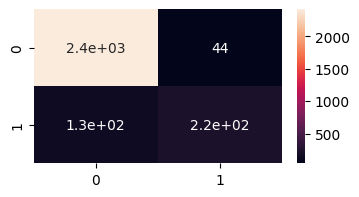

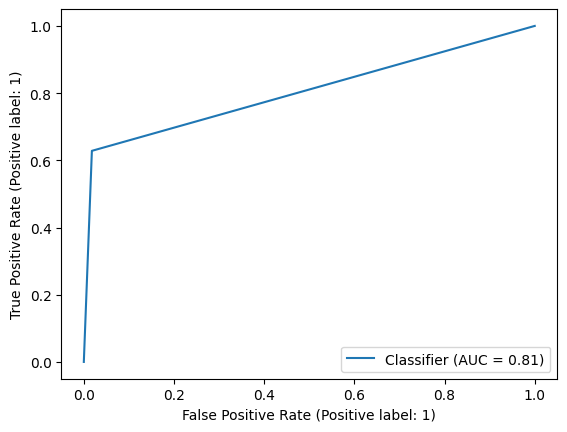

In [83]:
show_metrics('random_forest_classifier(before tuning)',rc)

training accuracy of  random_forest_classifier(after tuning)  :  0.9593968894693102
testing accuracy of  random_forest_classifier(after tuning)  :  0.9408831908831908
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97      2461
         1.0       0.85      0.63      0.73       347

    accuracy                           0.94      2808
   macro avg       0.90      0.81      0.85      2808
weighted avg       0.94      0.94      0.94      2808



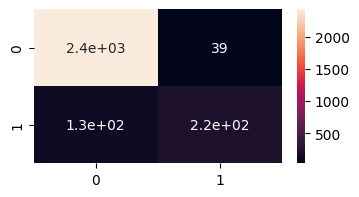

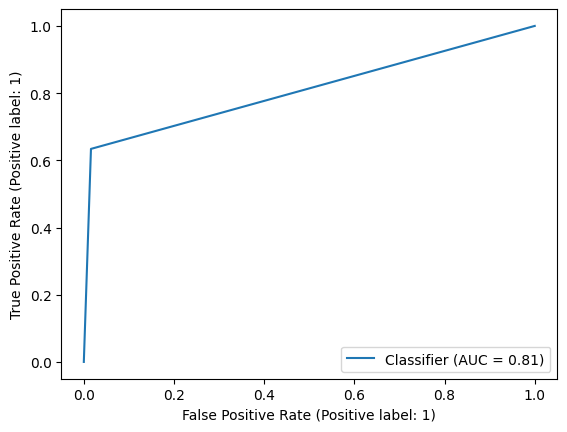

In [84]:
show_metrics('random_forest_classifier(after tuning)',rc2)

training accuracy of  decision_tree_classifier(before tuning)  :  1.0
testing accuracy of  decision_tree_classifier(before tuning)  :  0.8835470085470085
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93      2461
         1.0       0.53      0.58      0.55       347

    accuracy                           0.88      2808
   macro avg       0.73      0.75      0.74      2808
weighted avg       0.89      0.88      0.89      2808



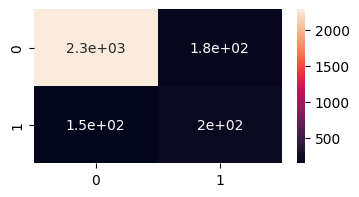

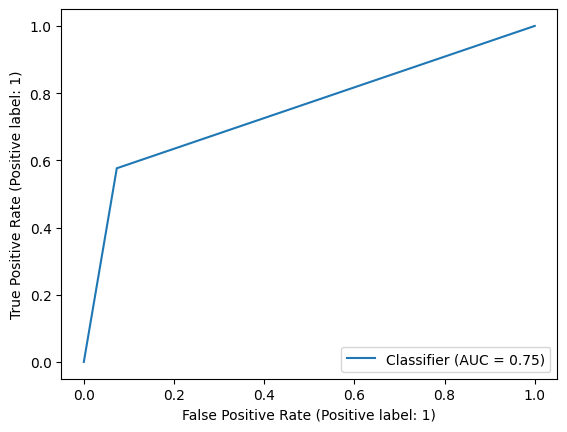

In [85]:
show_metrics('decision_tree_classifier(before tuning)',dc)

training accuracy of  decision_tree_classifier(after tuning)  :  0.9436067909295975
testing accuracy of  decision_tree_classifier(after tuning)  :  0.9334045584045584
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2461
         1.0       0.90      0.52      0.66       347

    accuracy                           0.93      2808
   macro avg       0.92      0.76      0.81      2808
weighted avg       0.93      0.93      0.93      2808



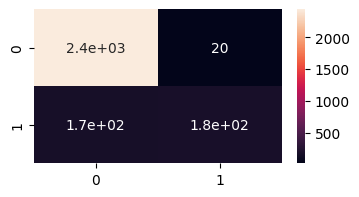

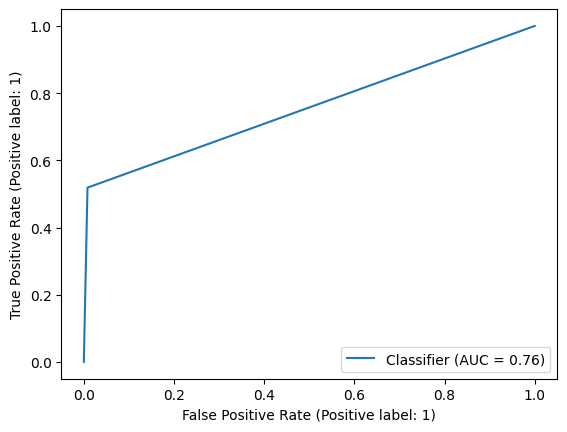

In [86]:
show_metrics('decision_tree_classifier(after tuning)',dc2)

264/264 [==============================] - 0s 1ms/step
training accuracy of  artificial_neural_network  :  0.9482369702006411
88/88 [==============================] - 0s 894us/step
testing accuracy of  artificial_neural_network  :  0.9391025641025641
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2461
         1.0       0.87      0.59      0.71       347

    accuracy                           0.94      2808
   macro avg       0.91      0.79      0.84      2808
weighted avg       0.94      0.94      0.93      2808



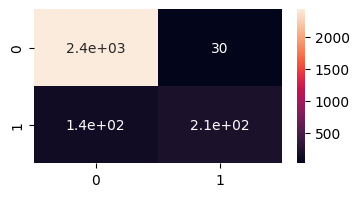

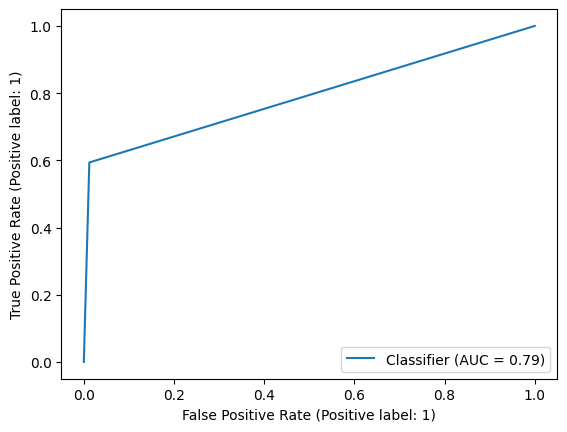

In [87]:
show_metrics('artificial_neural_network',cl)

saving the best model (random tree classifier) 

In [88]:
pickle.dump(rc2,open('random_forest_classifier.pkl','wb'))